In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import keras

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=8,kernel_size=(5,5),input_shape=(32,32,3),activation="tanh"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(5,5),activation="tanh"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120,activation="tanh"))
model.add(keras.layers.Dense(84,activation="tanh"))
model.add(keras.layers.Dense(10,activation="sigmoid"))
model.add(keras.layers.Softmax())

In [5]:
 model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [6]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:
x = np.random.randn(20,32,32,3)
y = (np.random.randint(0,9,size=(20,1))==np.arange(10)).astype(int)

In [8]:
y

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [9]:
history = model.fit(x, y, epochs=100, batch_size=128)

Epoch 1/100
1/1 [==============================] - 1s 923ms/step - loss: 2.3597 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 27ms/step - loss: 2.2687 - accuracy: 0.2000
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 2.2065 - accuracy: 0.2000
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 2.1701 - accuracy: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 2.1469 - accuracy: 0.2000
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 2.1287 - accuracy: 0.2000
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 2.1121 - accuracy: 0.2000
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 2.0950 - accuracy: 0.2000
Epoch 9/100
1/1 [==============================] - 0s 28ms/step - loss: 2.0757 - accuracy: 0.2000
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 2.0530 - accuracy: 0.2000
Epoch 11/100
1

In [10]:
history_dict = history.history
print("Keys: ",history_dict.keys())

Keys:  dict_keys(['loss', 'accuracy'])


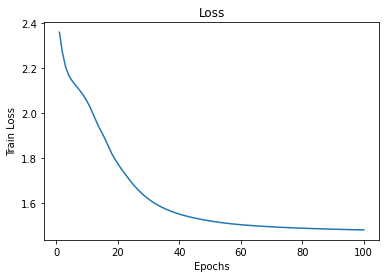

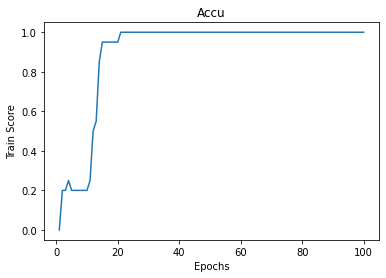

In [11]:
import matplotlib.pyplot as plt

epochs = range(1,101)
loss = history_dict['loss']
accuracy = history_dict['accuracy']

plt.plot(epochs,loss)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.show()

plt.plot(epochs,accuracy)
plt.title("Accu")
plt.xlabel("Epochs")
plt.ylabel("Train Score")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


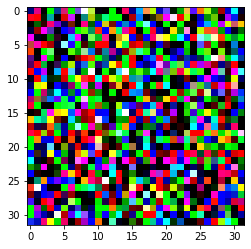

In [12]:
plt.imshow(x[19])

In [15]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mnist_train.csv")

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
df.shape

(60000, 785)

In [17]:
df.head()

label  1x1  1x2  1x3  1x4  1x5  ...  28x23  28x24  28x25  28x26  28x27  28x28
0      5    0    0    0    0    0  ...      0      0      0      0      0      0
1      0    0    0    0    0    0  ...      0      0      0      0      0      0
2      4    0    0    0    0    0  ...      0      0      0      0      0      0
3      1    0    0    0    0    0  ...      0      0      0      0      0      0
4      9    0    0    0    0    0  ...      0      0      0      0      0      0

[5 rows x 785 columns]

In [18]:
sample = df.iloc[0,1:].values.reshape(28,28)

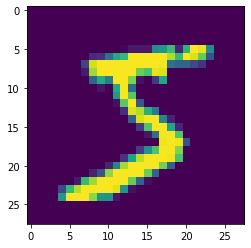

In [19]:
plt.imshow(sample)

In [20]:
X = df.iloc[:,1:].values.reshape(-1,28,28,1)

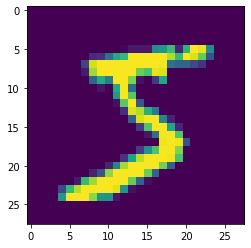

In [21]:
plt.imshow(X[0,:,:,0])

In [22]:
y=(df["label"].values.reshape(-1,1)==np.arange(10)).astype(int)
y

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

## Comparison optimization algorithms

### Adam

In [23]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Conv2D(filters=6,kernel_size=(5,5),input_shape=(28,28,1),activation="tanh"))
model1.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(keras.layers.Conv2D(filters=16,kernel_size=(5,5),activation="tanh"))
model1.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(120,activation="tanh"))
model1.add(keras.layers.Dense(84,activation="tanh"))
model1.add(keras.layers.Dense(10,activation="sigmoid"))
model1.add(keras.layers.Softmax())

In [24]:
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [25]:
history1 = model1.fit(X, y, epochs=5, batch_size=256)

Epoch 1/5
235/235 [==============================] - 22s 90ms/step - loss: 1.6500 - accuracy: 0.8714
Epoch 2/5
235/235 [==============================] - 21s 89ms/step - loss: 1.5070 - accuracy: 0.9607
Epoch 3/5
235/235 [==============================] - 21s 89ms/step - loss: 1.4914 - accuracy: 0.9702
Epoch 4/5
235/235 [==============================] - 23s 97ms/step - loss: 1.4847 - accuracy: 0.9757
Epoch 5/5
235/235 [==============================] - 21s 90ms/step - loss: 1.4806 - accuracy: 0.9787


In [26]:
history1_dict = history1.history
print("Keys: ",history1_dict.keys())

Keys:  dict_keys(['loss', 'accuracy'])


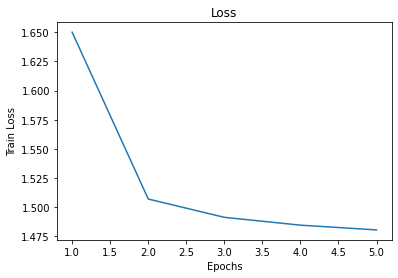

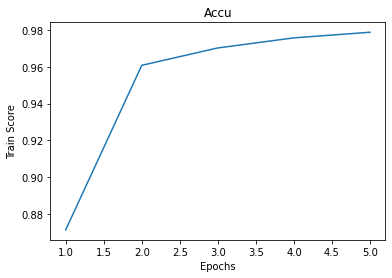

In [27]:
epochs = range(1,6)
loss1 = history1_dict['loss']
accuracy1 = history1_dict['accuracy']

plt.plot(epochs,loss1)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.show()

plt.plot(epochs,accuracy1)
plt.title("Accu")
plt.xlabel("Epochs")
plt.ylabel("Train Score")
plt.show()

### SGD

In [28]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(filters=6,kernel_size=(5,5),input_shape=(28,28,1),activation="tanh"))
model2.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(keras.layers.Conv2D(filters=16,kernel_size=(5,5),activation="tanh"))
model2.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(120,activation="tanh"))
model2.add(keras.layers.Dense(84,activation="tanh"))
model2.add(keras.layers.Dense(10,activation="sigmoid"))
model2.add(keras.layers.Softmax())

In [29]:
model2.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [30]:
history2 = model2.fit(X, y, epochs=5, batch_size=256)

Epoch 1/5
235/235 [==============================] - 22s 89ms/step - loss: 2.2224 - accuracy: 0.3445
Epoch 2/5
235/235 [==============================] - 21s 89ms/step - loss: 2.0674 - accuracy: 0.6369
Epoch 3/5
235/235 [==============================] - 21s 89ms/step - loss: 1.9625 - accuracy: 0.7213
Epoch 4/5
235/235 [==============================] - 21s 89ms/step - loss: 1.8960 - accuracy: 0.7625
Epoch 5/5
235/235 [==============================] - 21s 89ms/step - loss: 1.8492 - accuracy: 0.7913


In [31]:
history2_dict = history2.history
print("Keys: ",history2_dict.keys())

Keys:  dict_keys(['loss', 'accuracy'])


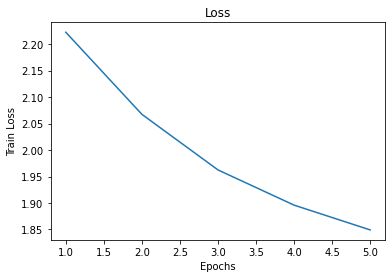

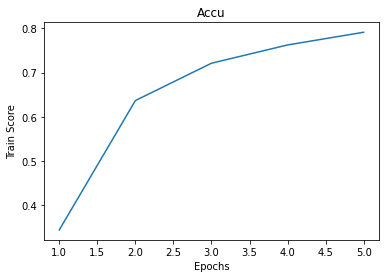

In [32]:
epochs = range(1,6)
loss2 = history2_dict['loss']
accuracy2 = history2_dict['accuracy']

plt.plot(epochs,loss2)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.show()

plt.plot(epochs,accuracy2)
plt.title("Accu")
plt.xlabel("Epochs")
plt.ylabel("Train Score")
plt.show()

### Adagrad

In [33]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Conv2D(filters=6,kernel_size=(5,5),input_shape=(28,28,1),activation="tanh"))
model3.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model3.add(keras.layers.Conv2D(filters=16,kernel_size=(5,5),activation="tanh"))
model3.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(120,activation="tanh"))
model3.add(keras.layers.Dense(84,activation="tanh"))
model3.add(keras.layers.Dense(10,activation="sigmoid"))
model3.add(keras.layers.Softmax())

In [34]:
model3.compile(optimizer="adagrad", loss="categorical_crossentropy", metrics=["accuracy"])

In [35]:
history3 = model3.fit(X, y, epochs=5, batch_size=256)

Epoch 1/5
235/235 [==============================] - 21s 89ms/step - loss: 2.2810 - accuracy: 0.1686
Epoch 2/5
235/235 [==============================] - 21s 89ms/step - loss: 2.2228 - accuracy: 0.3447
Epoch 3/5
235/235 [==============================] - 21s 89ms/step - loss: 2.1715 - accuracy: 0.4671
Epoch 4/5
235/235 [==============================] - 21s 89ms/step - loss: 2.1232 - accuracy: 0.5467
Epoch 5/5
235/235 [==============================] - 21s 89ms/step - loss: 2.0787 - accuracy: 0.6024


In [36]:
history3_dict = history3.history
print("Keys: ",history3_dict.keys())

Keys:  dict_keys(['loss', 'accuracy'])


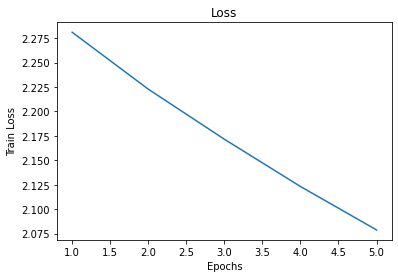

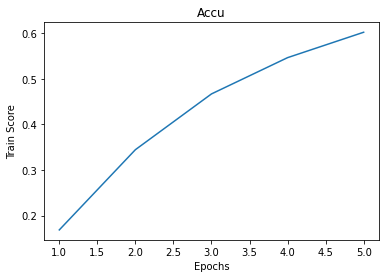

In [37]:
epochs = range(1,6)
loss3 = history3_dict['loss']
accuracy3 = history3_dict['accuracy']

plt.plot(epochs,loss3)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.show()

plt.plot(epochs,accuracy3)
plt.title("Accu")
plt.xlabel("Epochs")
plt.ylabel("Train Score")
plt.show()

### Rmsprop

In [42]:
model4 = keras.models.Sequential()
model4.add(keras.layers.Conv2D(filters=6,kernel_size=(5,5),input_shape=(28,28,1),activation="tanh"))
model4.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model4.add(keras.layers.Conv2D(filters=16,kernel_size=(5,5),activation="tanh"))
model4.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(120,activation="tanh"))
model4.add(keras.layers.Dense(84,activation="tanh"))
model4.add(keras.layers.Dense(10,activation="sigmoid"))
model4.add(keras.layers.Softmax())

In [43]:
model4.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [44]:
history4 = model4.fit(X, y, epochs=5, batch_size=256)

Epoch 1/5
235/235 [==============================] - 22s 90ms/step - loss: 1.6107 - accuracy: 0.9064
Epoch 2/5
235/235 [==============================] - 21s 89ms/step - loss: 1.4931 - accuracy: 0.9704
Epoch 3/5
235/235 [==============================] - 21s 90ms/step - loss: 1.4822 - accuracy: 0.9785
Epoch 4/5
235/235 [==============================] - 21s 89ms/step - loss: 1.4775 - accuracy: 0.9825
Epoch 5/5
235/235 [==============================] - 21s 89ms/step - loss: 1.4748 - accuracy: 0.9847


In [45]:
history4_dict = history4.history
print("Keys: ",history4_dict.keys())

Keys:  dict_keys(['loss', 'accuracy'])


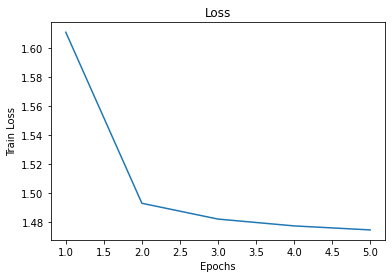

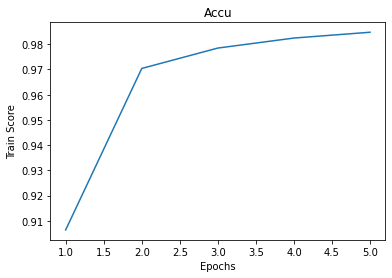

In [46]:
epochs = range(1,6)
loss4 = history4_dict['loss']
accuracy4 = history4_dict['accuracy']

plt.plot(epochs,loss4)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.show()

plt.plot(epochs,accuracy4)
plt.title("Accu")
plt.xlabel("Epochs")
plt.ylabel("Train Score")
plt.show()

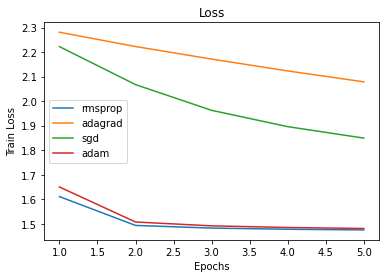

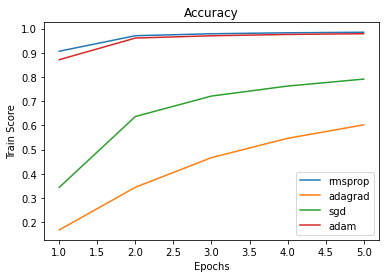

In [50]:
epochs = range(1,6)

plt.plot(epochs,loss4, label="rmsprop")
plt.plot(epochs,loss3, label="adagrad")
plt.plot(epochs,loss2, label="sgd")
plt.plot(epochs,loss1, label="adam")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.legend()
plt.show()


plt.plot(epochs,accuracy4, label="rmsprop")
plt.plot(epochs,accuracy3, label="adagrad")
plt.plot(epochs,accuracy2, label="sgd")
plt.plot(epochs,accuracy1, label="adam")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Train Score")
plt.legend()
plt.show()


# Test Scores on Test Data ana Comparison of Results

In [51]:
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mnist_test.csv")
df_test.shape

(10000, 785)

In [52]:
X_test = df_test.iloc[:,1:].values.reshape(-1,28,28,1)

In [53]:
y_test = (df_test["label"].values.reshape(-1,1)==np.arange(10)).astype(int)

In [54]:
from sklearn.metrics import accuracy_score

In [59]:
ypred1 = np.argmax(model1.predict(X_test), axis=1)

In [60]:
accuracy_score(df_test["label"], ypred1) # adam

0.9795

In [61]:
ypred2 = np.argmax(model2.predict(X_test), axis=1)
accuracy_score(df_test["label"],  ypred2) #sgd

0.8111

In [62]:
ypred3 = np.argmax(model3.predict(X_test), axis=1)
accuracy_score(df_test["label"],  ypred3) #adagrad

0.6366

In [63]:
ypred4 = np.argmax(model4.predict(X_test), axis=1)
accuracy_score(df_test["label"],  ypred4) #rmsprob

0.983